<figure><right>
<img   src="../../figuras/logos/Logo_TalentQ_Azul.png" align=right  width="150px"/>
</right></figure>



# Computación cuántica universal

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\bn}{{\bf n}} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \newcommand{\bsig}{\boldsymbol{\sigma}} $


In [3]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex


En este capítulo vamos a detenernos en algunos *recursos en programación cuántica* que serán de uso muy frecuente. 


## Circuitos Equivalentes

Los circuitos son una representación gráfica de la descomposición de un cierto operador unitarios en un producto de puertas locales y de dos o más cúbits. Esta descomposición no es única, lo cuál permite compilar un circuito de forma que se elija la descomposición más ventajosa. Vamos a ver algunas equivalencias que permiten, en ocasiones reducir la profundidad de un circuito, y en otras, entender mejor el funcionamiento del circuito.


###  Conjugación

Cualquier operador, $O$, formado por productos de operadores del conjunto $C = \{X,Y,Z,H,S\}$ conjuga lo operadores de Pauli $P = \{ X,Y,Z\}$ entre sí

$$
CP C^\dagger = P'
$$

Por ejemplo

$$
H Z H = X~~~~~,~~~~~H X H = Z ~~~~~,~~~~~ S X S^\dagger =  Y ~~~~~~ , ~~~~~ S Y S^\dagger =  -X~~...
$$

<br>

Operando se pueden verificar fácilmente esta igualdades, que implican la equivalencia de circuitos como el siguiente
<br>
<br>

<figure><center>
<img src="images/H_conjugation.png" align=center width='450px'/>
<center></center>
</center></figure>
<br>


Las conjugaciones anteriores se extienden a rotaciones de ángulos arbitrarios. Por ejemplo:

\begin{eqnarray*}
H R_z(\theta) H &=& e^{-i \theta/2 HZH} =  e^{-i (\theta/2) X} \\ \rule{0mm}{8mm}
&=& R_x(\theta)
\end{eqnarray*}

<br>
<figure>
<img src="images/HRzHconjugation.png" align=center width='700px'/>
<center></center>
</figure>
<br>




### Circuitos con controles

La puerta  controlada $\cg{Z} =  {\rm diag}(1,1,1,-1)$   es simétrica ya que lo único que hace es cambiar de signo al estado $\ket{11}$. Es decir

<br>

<figure><center>
<img src="images/Equiv_Z.png" align=center width='300px'/>
<center></center>
</center></figure>

<br>

En realidad, $\cg{Z}$ es un caso particular de   $\cg{P(\phi)} = {\rm diag} (1,1,1, e^{i\phi})$, para la cual la equivalencia es la misma. 


Una equivalencia importante es

<br>
<figure><center>
<img src="images/Equiv_HH.png" align=center width='400px'/>
<center></center>
</center></figure>
<br>

Para probar esta identidad  observemos que las tres puertas del segundo cúbit se pueden componer para dar $HXH=Z$. Por el contrario, las dos puertas de Hadamard en el primer cúbit no se pueden multiplicar al haber un control entre ellas. 
Sin embargo, usando la  equivalencia anterior podemos invertir la puerta $\cg{Z}$ y, finalmente, conjugar en el primer cúbit $HZH=X$.




Otra  equivalencia nada intuitiva pero muy importante relaciona tres operaciones CNOT con la permutación U$_{\rm SWAP}$


<br>
<figure><center>
<img src="images/Equiv_CNOTs.png" align=center width='400px'/>
<center></center>
</center></figure>
<br>

No hay una forma sencilla de probar esta identidad, así que lo recomendable es escribir las matrices asociadas a cada miembro y comprobar que son iguales. 

Esta identidad es tan importante que, de hecho es la forma en la que simplementa el operador U$_{\rm SWAP}$ en un ordenador cuántico. 


 

La puerta de phase global controlada, $\cg{K_\phi} = {\rm diag} (1,1,e^{i\phi}, e^{i\phi})$, secretamente, no es una puerta controlada


<br>
<figure><center>
<img src="images/Equiv_Kphase.png" align=center width='330px'/>
<center></center>
</center></figure>
<br>


Hay que tener cuidado a la hora de pasar operadores de Pauli por encima de un control
Es sencillo comprobar que el resultado de los dos circuitos siguientes es el mismo, por tanto son equivalentes. 

<br>
<figure><center>
<img src="images/control_conj_Z.png" align=center width='400px'/>
<center></center>
</center></figure>
<br>

En cambio, la conjugación por $X$ o por $Y$ cambia el cúbit de control de $\ket{1}$ a $\ket{0}$, lo cual se representa con un botón vacío


<br>
<figure><center>
<img src="images/control_conj_XY.png" align=center width='700px'/>
<center></center>
</center></figure>
<br>




Podemos verificar la veracidad de las anteriores identidades programando los circuitos de ambos miembros

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import UnitarySimulator

U_simulator = UnitarySimulator

qc_left= QuantumCircuit(2)
qc_right= QuantumCircuit(2)

qc_left.cx(0,1)
qc_left.cx(1,0)
qc_left.cx(0,1)
qc_right.swap(1,0)
 
print(qc_left)
print(qc_right)

U_left = U_simulator().run(qc_left).result().get_unitary()
U_right = U_simulator().run(qc_right).result().get_unitary()

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
        
q_0: ─X─
      │ 
q_1: ─X─
        


comprobemos que las matrices que representan los circuitos coinciden

In [11]:
from qiskit.visualization import array_to_latex
display(array_to_latex(U_left, prefix=' U_{left} = '))
display(array_to_latex(U_right, prefix=' U_{right} = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Medidas y controles

En muchas instancias el resultado de una medida se utiliza para efectuar una operación condicionada sobre un cierto cúbit. Es el caso de la teleportación o la codificación superdensa. 

En estos casos hay una equivalencia de circuitos que responde al siguiente principio

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> <i>Principio de la medida diferida</i>
<br>    
Las medidas pueden siempre moverse de un lugar intermedio en un circuito, al final del mismo. Si los resultados de las medidas se usan para operaciones controladas clásicamente, estas pueden remplazarse por operadores condicionados cuánticamente 
<br>
<br>     
</p></div>

La siguiente imagen ilustra la equivalencia de circuitos a que se refiere el teorema anterior.

<br>
<figure><center>
<img src="images/deferred_meas.png" align=center width='500px'/>
<center></center>
</center></figure>
<br>

La segunda figura es sólo notación en la que directamente un aparato de medida controla un operador. 

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br> demuestra la equivalencia de los circuitos anteriores.  
</div>    

### Reinicialización a cero


La las medidas intermedias sirven para poder efectuar operaciones controladas por un bit clásico. Veremos una utilización de este recurso cuando estudiemos la teleportación. Aquí vamos a ver cómo podemos utilizar dicha medida para reinicializar un cúbit al estado de partida $\ket{0}$.

En el siguiente circuto, $\ket{\psi} = a\ket{0} + b\ket{1}$ puede colapsar en el aparato de medida a $\ket{0}$ ó a 
$\ket{1}$. En ambos casos, la salida del circuitos será el estado $\ket{0}$

<br>
<figure><center>
<img src="images/reset.png" align=center width='230px'/>
<center></center>
</center></figure>
<br>

## Retroceso de Fase

 Hemos estudiado ya el operador controlado $\cg{U}$. Es un error frecuente pensar que el cúbit controlador no se modifica. Un caso importante ocurre cuando el operador $U$ actúa sobre uno de sus autoestados 
(recuerda que los autovalores de  un operador unitario son fases puras)

<br>
$$
U\ket{u} = e^{i\lambda} \ket{u}
$$
<br>

 Supongamos que por el *cúbit controlador* circula una superposición $(a\ket{0}+b\ket{1})$ y un autoestado $\ket{u}$ de $U$ por el cúbit controlado. La acción de $\cg{U}$ es
<br>
<br>

$$
\cg{U}: (a\ket{0} + b\ket{1})\otimes \ket{u} ~\to ~ a\ket{0}\ket{u} + b \ket{1}e^{i\lambda}\ket{u}  = \left( a\ket{0}\ket{u} + be^{i\lambda} \ket{1} \rule{0mm}{4mm} \right)\otimes \ket{u}
$$
<br>


 En resultado final es que la fase $e^{i\lambda}$ ha **modificado** el estado de entrada, mientras que el segundo cúbit no ha cambiado. 

El punto es que, en el segundo paso, la fase generada por la acción de U *no pertenece* realmente a ninguno de los dos espacios sino al producto. De modo que puede adscribirse al primer espacio, como hemos hecho en el último paso. 
De ahí el nombre de *retroceso de fase*, en inglés "phase kickback". 

El siguiente circuito resume la acción de retroceso de fase

<br>
<figure>
<img src="images/phase_kickback.png" align=center width='300px'/>
<center></center>
</figure>
<br>


<div class="alert alert-block alert-success">

<b>Ejercicio</b> 
    
Programa un circuito en el que  $U = P(\phi)$ sea el operador de fase y el estado en el primer cúbit es $\ket{0}$ y en el segundo es $\ket{1}$. 
    
    
- Usando el *statevector_simulator* representa el estado de salida para distintos de valores de $\phi\in [0,2\pi]$ 
    
- ¿en qué plano rota el vector del primer cúbit? ¿Cómo podemos cambiar dicho plano de rotación?
</div>


Un caso muy frecuente ocurre cuando $U = X$, es decir $\cg{U} = \hbox{CNOT}$. Los autovalores de $X$ son los que forman la base $\ket{\pm}$. En el caso de $\ket{-}$ tendremos
que la fase es $e^{i\pi} = -1$

$$
X \ket{-} = (-1) \ket{-}
$$



$$
\cg{X} \big( \ket{x}\otimes \ket{-}\big) ~=~ \ket{x} X^x\ket{-} =  (-1)^x \ket{x} \otimes \ket{-}
$$

El retroceso de fase consigue de esta manera imprimir el valor del cúbit de control en una fase. 

## Computación Cuántica Universal

### Teorema de descomposición

En el paradigma de computador cuántico de Deutsch, el objetivo es ser capaz de implementar el operador unitario más general

$$
U  = \sum_x \ket{f(x)}\bra{x}
$$
donde $f: x \to f(x)$ es una función arbitraria invertible. El reto tecnológico es que sólamente seamos capaces de implementar puertas simples de uno y dos cúbits. El siguiente teorema es un primer paso en esa dirección.

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema</b> <i>(Barenco et. al. 1995):</i> 
<br>
Cualquier operador unitario $U_n$ sobre $n$ cúbits puede expresarse como el producto de  
<br>
<br>
$~~~$-  rotaciones arbitrarias  de <i>un cubit</i> 
<br>  
$~~~$-  puertas CNOT.
</p></div>

Un ejemplo de este teorema ya lo hemos visto en la descomposición de la puerta $U_{SWAP}$ como producto de tres $\hbox{CNOT}$.

Otro caso lo observamos en  la siguiente  equivalencia de circuitos para la puerta controlada $U = \cg{P_\phi}$


<br>
<figure><center>
<img src="images/Equiv_Phase.png" align=center width='600px'/>
<center></center>
</center></figure>
<br>



<div class="alert alert-block alert-success">
    <b>Ejercicio</b> 
 
    
Comprueba la equivalencia de los dos circuitos siguientes, siempre que se verifique que $V^2 = U$


<br>
<figure><center>
<img src="images/CCUdecomposition.png" align=center width='450px'/>
<center></center>
</center></figure>
<br>
    
    
</div>


No vamos a probar rigurosamente el teorema anterior, pero sí señalar los pasos más importantes, que son 4:

1.  cualquier operador $U_n$ sobre $n$ cúbits se puede descomponer como *producto de operadores* $\cg{^kU}$ controlados por $k$ cúbits

2. los operadores $\hbox{C}^kU$ se pueden descomponer como productos de un  operador $\cg{U}$ y puertas de Toffoli CCNOT

$\rule{7mm}{0mm}$En general para $\cg{^kU}$ necesitamos $k-1$ ancillas


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/CkUdecomposition.png" align=center width='400px'/>
<center></center>
</center></figure>
<br>

<a id="Toffolidecomposition"></a>

3. Las puertas de Toffoli puede descomponerse como productos de $H$, $\cg{X}$ y $\cg{S}$


<br>
<figure><center>
<img src="images/Toffolidecomposition.png" align=center width='450px'/>
<center></center>
</center></figure>
<br>


$\rule{7mm}{0mm}$Este no es más que el caso particular  de la descomposición general de $\cg{^2U}$ usando $U = X = HZH=HSSH =  (HSH)(HSH)= V^2 ~~\Rightarrow ~~V = HSH$.

<a id="CUdecomposition"></a>
4. Una puerta $\cg{U}$ puede descomponerse de forma única usando tres rotaciones $A, B$ y $C$ que verifiquen

$$
ABC = I ~~~~~,~~~~ e^{i\delta}  AXBXC = U
$$

<br>
<figure><center>
<img src="images/CUdecomposition.png" align=center width='600px'/>
<center></center>
</center></figure>
<br>

$\rule{7mm}{0mm}$En efecto, si el cúbit de control es $\ket{0}$ la fase $P(\delta)$ no le afecta y el operador efectivo en el segundo cúbit es $ABC= I$.

$\rule{7mm}{0mm}$Por el contrario, si el primer cúbits es $\ket{1}$, entonces se aplica $AXBXC$ al segundo cúbit, y 
el operador $P(\delta)$ añade la fase global, que al ser global podemos pasársela al segundo cúbit, lo que hace $e^{i\delta} AXBXC = U$

<details><summary><p style="color:blue" > >> <i>Detalles</i> </p></summary>

Las dos condiciones  algebráicas admiten una solución única para un operador unitario genérico
   
$$
U = e^{i\delta}\begin{bmatrix}\displaystyle e^{-i(\alpha+\beta)/2}\cos\frac{\theta}{2} & \displaystyle - e^{i(-\alpha+\beta)/2}\sin\frac{\theta}{2}  \\  
\rule{0mm}{5mm}
\displaystyle   e^{i(\alpha-\beta)/2}\sin\frac{\theta}{2}  &\displaystyle e^{i(\alpha+\beta)/2}\cos\frac{\theta}{2}
\end{bmatrix} = e^{i\delta} AXBXC ~  \Longrightarrow ~
\left\{ \begin{array}{l} A = R_z(\alpha) R_y\left(\frac{\theta}{2}\right) \\ B = R_y\left(-\frac{\theta}{2}\right) R_z\left(-\frac{\alpha + \beta}{2}\right) \\
C = R_z\left( \frac{\beta-\alpha}{2}\right)\end{array}
\right.
$$

<i> Nota: </i>: $U\in U(2)$  es un operador unitario y  su determinante es una fase $\det U = e^{i\delta}$.     Por su parte $\det(AXBXC) = 1$, y por tanto es un elemento de $SU(2)$.  Por esta razón es necesario añadir la fase $e^{i\delta}$ para obtener un operador unitario general. 
    
    
</details>    



### Computación cuántica digital


 La descomposición del teorema de Barenco es  una identidad exacta que permite descomponer un conjunto infinito y continuo de operadores $U_n$ en puertas CNOT y puertas *continuas* $U$. Hasta este punto, estaríamos hablando de un tipo de computación *analógica* puesto que las puertas de 1 cúbit han de ser rotaciones de ángulos reales arbitrarios. 

Sin embargo hay dos aspectos que aconsejan usar, en lugar de puertas continuas, un *conjunto discreto de puertas*

1.  El control de la precisión. Si dichas puertas no tuviesen error, entonces el error estaría en la truncación de los registros, igual que ocurre en computación clásica digital

2. La computación cuántica *resistentes a errores ("fault tolerant")* demanda la discretización del proceso de computación. En el fondo consiste en detectar un *mal funcionamiento* de una puerta discreta $X, Y$ ó $Z$ y coregirlo antes de que se propague. 

Dependiendo de la plataforma utilizada para construir un ordenador cuántico, existen uno o varios *conjuntos discretos de puertas universales* nativas susceptibles de ser programadas de manera resistente a errores 

Es importante relacionar las puertas universales con *puertas nativas*. Por ejemplo, 
en circuitos superconductores tenemos varias opciones

\begin{eqnarray}
\hbox{base de Shor}~~
 ~&:& ~~ \{ H, T, \hbox{CNOT}\}  \nonumber \\ \rule{0mm}{5mm}
\hbox{NCT}~ ~&:& ~~ \{ X,\hbox{CNOT}, \hbox{Toffoli}\}   \nonumber
\end{eqnarray}


En ordenadores de iones atrapados hay las siguientes [puertas nativas](https://ionq.com/docs/getting-started-with-native-gates#introducing-the-native-gates)

$$
\{ \hbox{GPi},\hbox{Virtual}Z, \hbox{MS}\} 
$$

<br>
<br>
donde 
$$
\hbox{GPi} = \begin{bmatrix} 0 & e^{-i\phi} \\e^{i\phi} & 0 \end{bmatrix}~~~,~~~
\hbox{Virtual}Z = \begin{bmatrix} e^{-i\phi} & 0 \\ 0 & e^{i\phi} \end{bmatrix} ~~,~~~~
$$

y la puerta de Mølmer-Sørensen

$$
MS(\phi_1,\phi_2) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 0 & e^{-i(\phi_1+\phi_2)} \\ 0 & 1 &-i e^{-i(\phi_1-\phi_2)} & 0 \\ 0 & -i e^{i(\phi_1-\phi_2)} & 1 & 0  \\ 
-ie^{i(\phi_1+\phi_2)} & 0 & 0 & 1 
\end{bmatrix}
$$

#### Teorema de Solovay Kitaev

Ya sabemos que un ordenador cuántico consigue una ganancia en memoria de trabajo exponencial de forma nativa: $n~ \hbox{cúbits} \to 2^n ~\hbox{registros}$.
Podría pasar que esta ganancia exponencial se viese compensada por un crecimiento exponencial en la profundidad del circuito. Entonces nos encontraríamos de nuevo con una barrera infranqueable para atacar problemas complejos.


El siguiente teorema pone las cosas en orden. Afirma que, por lo que respecta a la precisión de cálculo, la profundidad del circuito crece de forma logaritmica


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema</b> <i>(Solovay Kitaev et. al. 1995)</i>   
<br>    
Una puerta simple $U$ arbitraria puede ser aproximada con precisión $\epsilon$ usando una secuencia de puertas discretas 
$R$ en el siguiente sentido de proximidad
<br>
<br>
$$
\hbox{max}_{\ket{\psi}\in \Hil} \, \| (U - R)\ket{\psi} \|<\epsilon
$$
<br>    
donde la secuencia aproximante $R$ involucra   $\leq {\cal O}(\log^2(1/\epsilon))$ puertas de un conjunto discreto universal, 
</p></div>

Referencia: M.A. Nielsen y L.I. Chuang *Quantum Computation and Quantum Information*, pág. 197.


### Circuitos de Clifford


Observemos la base de Shor $\{H,T,\cg{X}\}$. Recordemos que $T^2 = S$ es una rotación de $\pi/4$ en torno al eje $Z$. ¿Qué pasaría si consideramos  la base $\{H,S,\cg{X}\}$? Aparentemente poco. Sin embargo estos operadores tiene una propiedad importante que los caracteriza.

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definición:</b> <i>Operador de Clifford</i>
<br>    
Se define un operador de Clifford $C\in \Lin(\Hil^{\otimes n}) $, como aquel que conjuga una cadena  de Pauli $P $ para dar otra cadena  de Pauli $P'$
<br>
<br>     
$$
C P C^{\dagger} = P'
$$
</p></div>

Por ejemplo, sea $P = YZX$,

\begin{eqnarray*}
(SXH) \, (YZX) \,  (SXH)^\dagger &=& (S\otimes X\otimes H) \cdot Y\otimes Z\otimes X \cdot (S^\dagger \otimes X\otimes H) \\ \rule{0mm}{10mm} 
&=& SYS^\dagger \otimes  XZX \otimes HXH \\ \rule{0mm}{10mm}
&=& (-Z)\otimes (-Z) \otimes Z \\ \rule{0mm}{10mm} &=& ZZZ
\end{eqnarray*}

es decir $P' = ZZZ$. En este caso, $C$ es un operador de Clifford porque está compuesto de un producto tensorial de operadores de Clifford de un cúbit. 
 Los propios operadores de Pauli son operadores de Clifford.  La conjugación correspondiente simplemente refleja el operador de Pauli. Por ejemplo, con $C=Z$

$$
ZXZ = -X~~~~~~~~~ZYZ = -Y ~~~~~~~~~ZZZ = Z 
$$
también $H$ y $S$ son de Clifford 

$$
H Z H = X~~~~~,~~~~~H X H = Z ~~~~~,~~~~~ S X S^\dagger =  Y ~~~~~~ , ~~~~~ S Y S^\dagger =  -X~~...
$$

 Muy importante: si $A$ y $B$ son operadores de Clifford, su producto $C = AB$ también lo es. Efectivamente   

$$
C P C^\dagger = AB P B^\dagger A^\dagger = A P' A^\dagger = P''
$$

Esto quiere decir que deberíamos poder generar todos los operadores de Clifford a partir de una base. De un cúbit es fácil ver que $\{ S,H \}$ son una tal base 

$$
Z  = S^2~~~~,~~~~X = H Z H = H S^2 H ~~~~,~~~~~  Y = SXS^\dagger  = SHS^2 HS^\dagger 
$$

Sin embargo, en el caso de cadenas de Pauli, hay un nuevo generador de operadores de Clifford: el operador $\cg{X}$. Efectivamente, por ejemplo sobre la cadena de Pauli $X I $

$$
\cg{X} \, (X\otimes I)\,  \cg{X} = X \otimes X
$$

Vemos que esta conjugación de Clifford *copia* el operador $X$ en el segundo cúbit. Podemos  demostrar gráficamente esta identidad 

<br>
<figure><center>
<img src="images/clone_X.png" align=center width='700px'/>
<center></center>
</center></figure>
<br>

<div class="alert alert-block alert-success">
<b>Ejercicio</b> 
demuestra las siguientes identidades entre circuitos
<br>
<br>
  
$$   
\begin{array}{lcl}
\cg{X}(Y\otimes I)\cg{X} = Y\otimes X ~~~~~ &&   \cg{X}(Z\otimes I)\cg{X} = Z\otimes I  \\
\cg{X}(I\otimes X)\cg{X} = I\otimes X ~~~~~ &&   \cg{X}(I\otimes Y)\cg{X} = Z\otimes Y  \\
\cg{X}(I\otimes Z)\cg{X} = Z\otimes Z ~~~~~ && \\
(R_z(\theta)\otimes I ) \cg{X} = \cg{X} (R_z(\theta)\otimes I ) && 
(R_x(\theta)\otimes I ) \cg{X} = \cg{X} (R_x(\theta)\otimes I )
\end{array}    
$$
</div>

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
Los operadores de Clifford pueden ser generados como composición del siguiente conjunto de operadores
<br>
<br>
$$
\{ H, S , \cg{X} \}
$$  
</p></div>





<div class="alert alert-block alert-warning">
<b>Resumen:</b>

- Un circuito que expresa la descomposición de un operador de Clifford se denomina *circuito de Clifford*.
    
- La relevancia de los circuitos de Clifford es que son emulables eficientemente en un computador clásico. 
    
</div>


## Medidas de calidad en circuitos

A la hora de comparar algoritmos es deseable poder caracterizar los circuitos que intervienen.
Consideremos el siguiente circuito. 

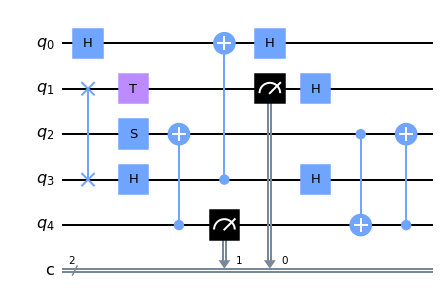

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(5,2)

qc.h(0)
qc.swap(3,1)
qc.h(3)
qc.cx(3,0)
qc.h([0,3])
qc.s([2])
qc.cx(4,2)
qc.measure(4,1)
qc.cx(2,4)
qc.cx(4,2)
qc.t(1)
qc.measure(1,0)
qc.h(1)
qc.draw('mpl')


Alguna medidas cuantitativas  permiten comparar la calidad de distintos circuitos que efectúan la misma tarea. 

- **anchura** *(width)*: es el número total de registros cuánticos y clásicos  que necesita.   

 El uso de ancillas incrementa la anchura de un circuito, y por tanto, reduce su calidad en comparación con otro circuito que tenga menor anchura. 


In [2]:
print('anchura=', qc.width())

anchura= 7


- **tamaño =  coste** *(size)*: el número de puertas  y aparatos de medida presentes en el mismo. 


In [3]:
print('tamaño=',qc.size())


tamaño= 14


- **complejidad**= es una medida de la *produndidad real* asociada al número de *puertas elementales* en las que se descompone un circuito. 

 Es un número a reducir. Sin embargo no es una medida inambigua ya que depende de la librería utilizada. Por ejemplo, si ésta es la NCT, entonces el coste del [circuito](#Toffolidecomposition) es 1. Sin embargo, si la librería es la tomada por $ \{ H, S, T, \hbox{CNOT}\} $
entonces el coste sube hasta 7. Por ello, a la hora de comparar circuitos es importante definirlos en la misma base. 


complejidad= 16


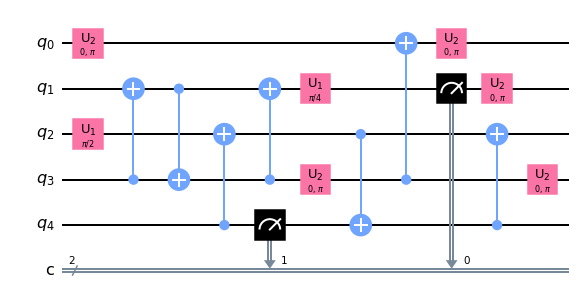

In [4]:
qc_dec=qc.decompose()
print('complejidad=', qc_dec.size())
qc_dec.draw('mpl')

- **profundidad**= para evaluar la *profundidad*  es necesario agrupar todas las puertas  que se puedan realizar en paralelo en cortes temporales de duración $\Delta$ (pulso).
 
 En particular puertas que actúen sobre registros diferentes no interferirán y se podrán paralelizar. 
 Por ejemplo, el [circuito que descompone $U$](#CUdecomposition)   tiene un coste igual a 6, pero una profundidad igual a 5. 
 



In [5]:
print('profundidad=', qc.depth())

profundidad= 5


- **factores unitarios**= un circuito es un operador unitario que puede estar formado por $r$ factores $U = U_1 U_2...U_r$. En el circuito cada factor se corresponde con un grupo de cúbits que están desconectados de los demás. Esto sólo afecta a las puertas lógicas, no a los aparatos de medida, que siempre son locales.

In [6]:
print('factores unitarios =', qc.num_unitary_factors())

factores unitarios = 2


No es evidente este resultado a priori, pero si permutamos los cúbits 2 y 3 el circuito muestra claramente esta factorización

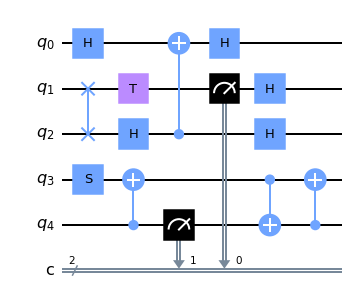

In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(5,2)


qc.h(0)
qc.swap(2,1)
qc.h(2)
qc.cx(2,0)
qc.h([0,2])
qc.s([3])
qc.cx(4,3)
qc.measure(4,1)
qc.cx(3,4)
qc.cx(4,3)
qc.t(1)
qc.measure(1,0)
qc.h(1)
qc.draw('mpl')
